# Assignment 4

## Arnold's cat map

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import animatplot as amp
from matplotlib.animation import FuncAnimation

from PIL import Image
from IPython.display import Math, display

%config InlineBackend.figure_format = 'pdf'

## Import the chosen images

In [2]:
# Import the images
# =================
KKL = Image.open("/Users/kev/Documents/Python/PHYS-421---Stat-Mech/Kitty Kovtun/Kitty Kovtun 124.jpg")
KKM = Image.open("/Users/kev/Documents/Python/PHYS-421---Stat-Mech/Kitty Kovtun/Kitty Kovtun 32.jpg")
KKS = Image.open("/Users/kev/Documents/Python/PHYS-421---Stat-Mech/Kitty Kovtun/Kitty Kovtun 10.jpg")

# Display the images
# ==================
fig, ax = plt.subplots(1, 3, figsize = (10, 4))
ax[0].imshow(np.array(KKL))
ax[0].set_xlabel(r"$124 \times 124$", fontsize=16)
ax[1].imshow(KKM)
ax[1].set_xlabel(r"$32 \times 32$", fontsize=16)
ax[2].imshow(KKS)
ax[2].set_xlabel(r"$10 \times 10$", fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 720x288 with 3 Axes>

## Cat map

Our images are in a jpeg format. In order to do any manipulation, we will have to convert it to an numpy array. After that is done, we will create a meshgrid with the same dimensions as our image. We will apply the Cat Map to this meshgrid, then ask our program to display each pixel in our image according to the newly mapped location. This will be repeated for each iteration of the Cat Map. 

In [3]:
# Function that generates a series of 
# Cat Maps from an image 
# P is the image
# n is the number of times the
# transformation is applied

def cat_map(P, n):
    A = np.array(P) # Convert "image" into an numpy array
    dim = np.shape(A) # Get the dimensions of the "image" 
    X, Y = np.meshgrid(range(dim[0]), range(dim[1])) # Create a meshgrid from the dimensions of the "image"
    X_prime = (X + Y) % dim[0] # Cat Map transformation for x-coordinates 
    Y_prime = (X + 2*Y) % dim[1] # Cat Map transformation for y-coordinates
    fig, ax = plt.subplots(int(n/10), 10, figsize=(25, int(n/10)*2.5), squeeze=False) # Get cells ready
    for i in range(0, n): # Apply the Cat Map 
        ax[int(i/10)][int(i % 10)].imshow(A) # Draw the image in each cell
        ax[int(i/10)][int(i % 10)].set_xlabel("{0}".format(i),  fontsize=24) # Label the iteration
        ax[int(i/10)][int(i % 10)].tick_params(axis='both', which='both', 
                                               bottom=False, top=False, left=False, right=False,
                                               labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                                               labelsize=0) # Remove x and y ticks
        A = A[Y_prime, X_prime] # Apply the transformation to the "image" and set it as the new "image"
        i += 1 # Next loop!
    plt.tight_layout()
    plt.show()
    
def cat_map_ani(P, n):
    Images = []
    A = np.array(P) # Convert "image" into an numpy array
    dim = np.shape(A) # Get the dimensions of the "image" 
    X, Y = np.meshgrid(range(dim[0]), range(dim[1])) # Create a meshgrid from the dimensions of the "image"
    X_prime = (X + Y) % dim[0] # Cat Map transformation for x-coordinates 
    Y_prime = (X + 2*Y) % dim[1] # Cat Map transformation for y-coordinates
    for i in range(0, n):
        A = A[Y_prime, X_prime] # Apply the transformation to the "image" and set it as the new "image"
        Images.append(A)
        i += 1 # Next loop!
    return Images

<IPython.core.display.Javascript object>


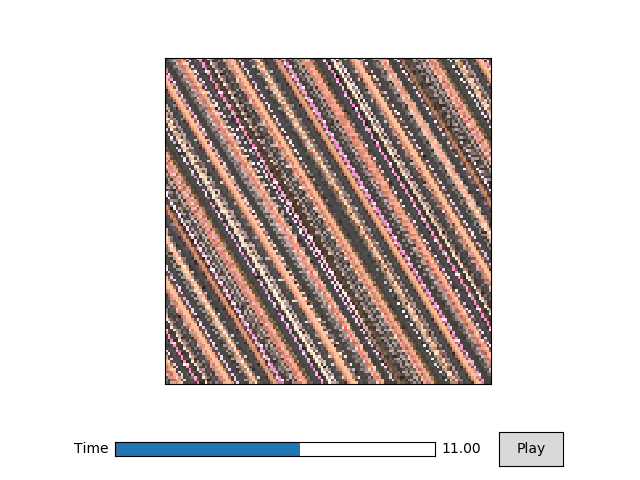

In [4]:
%matplotlib notebook
# Animation
# =========
plt.figure()
AniTest = cat_map_ani(KKL, 20)
block = amp.blocks.Imshow(AniTest)
anim = amp.Animation([block])
plt.tick_params(axis='both', which='both', 
           bottom=False, top=False, left=False, right=False,
           labelbottom=False, labeltop=False, labelleft=False, labelright=False,
           labelsize=0)

anim.controls()
anim.save_gif('ising')
plt.show()

Now that we have a function that generates the Cat Map, we can pass our image into the function and specify the number of mappings to apply to each image: 

### Cat map of the $124 \times 124$ picture:

<IPython.core.display.Javascript object>


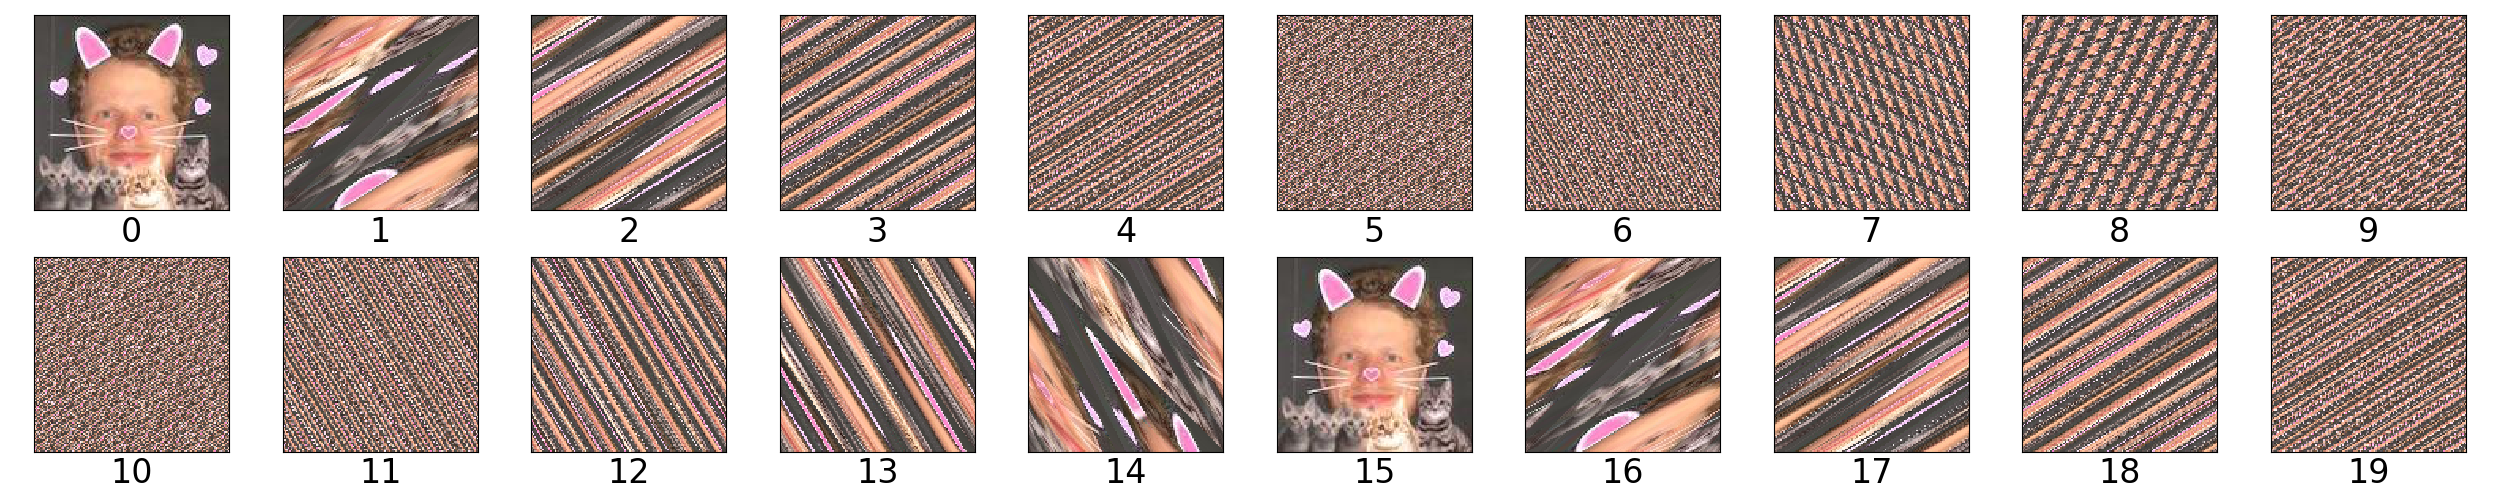

In [5]:
cat_map(KKL, 20)

### Cat map of the $32 \times 32$ picture:

<IPython.core.display.Javascript object>


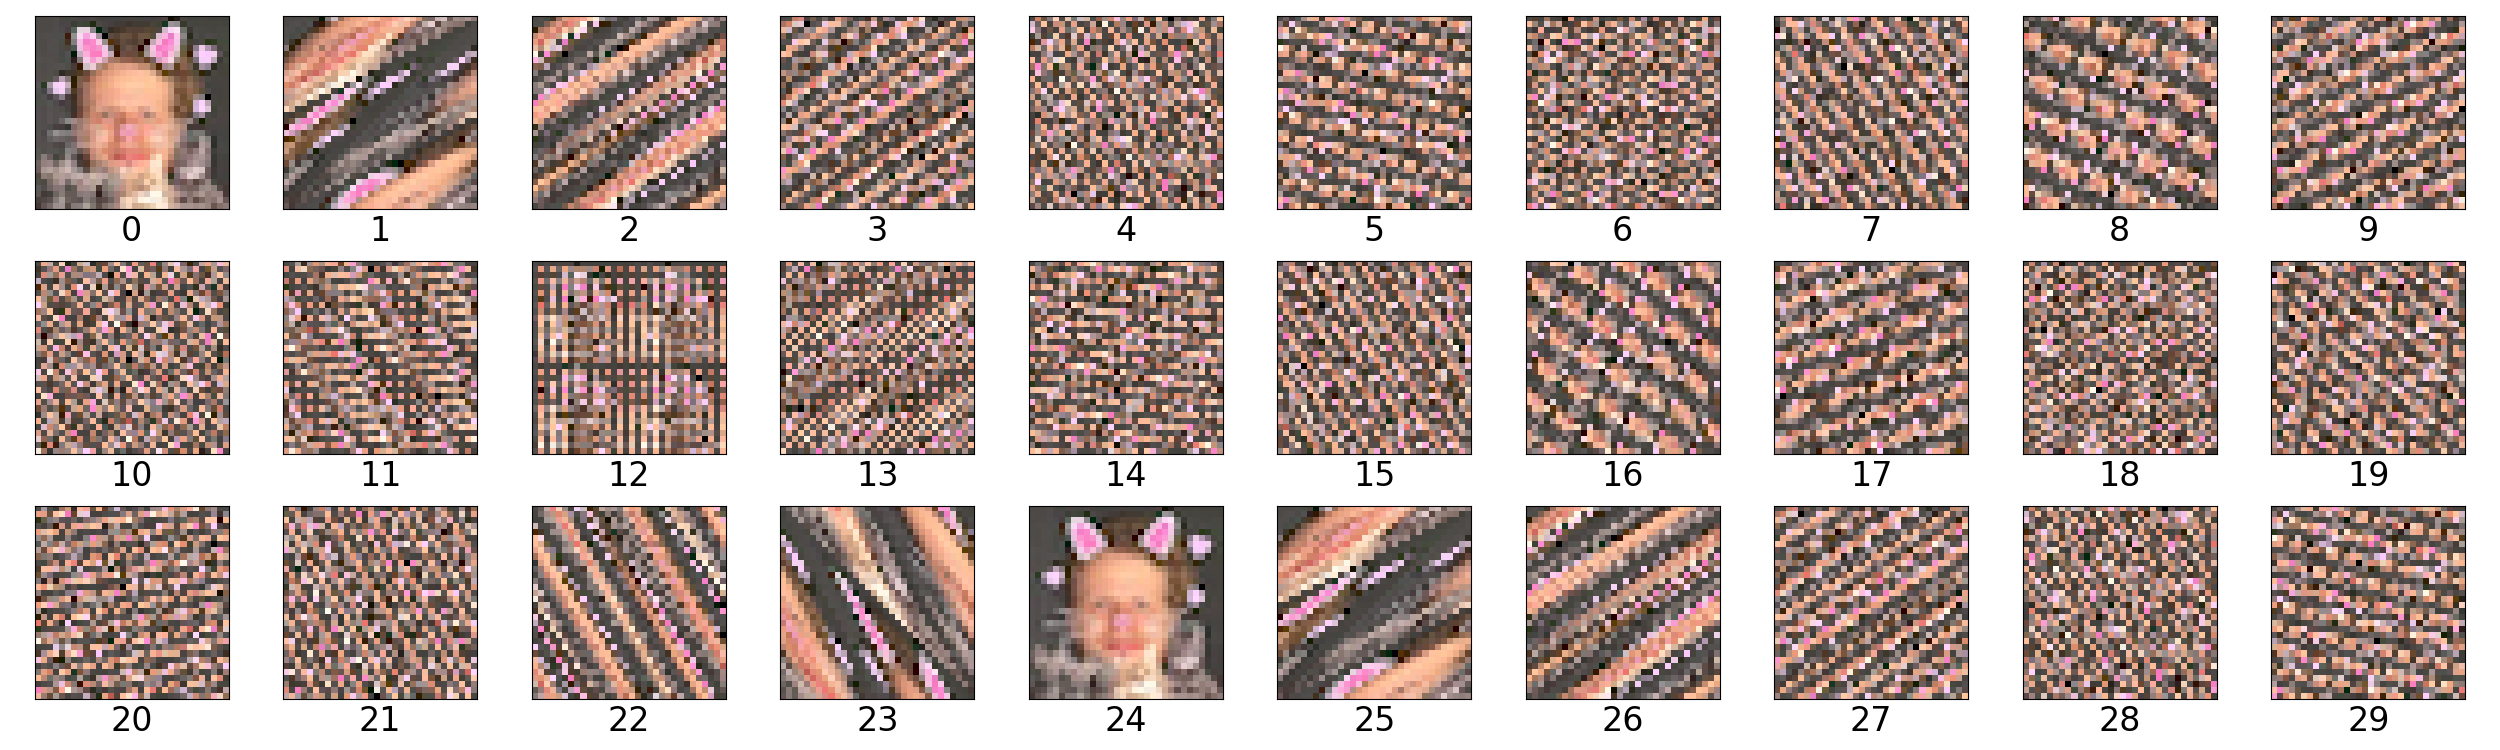

In [6]:
cat_map(KKM, 30)

### Cat map of the $10 \times 10$ picture:

<IPython.core.display.Javascript object>


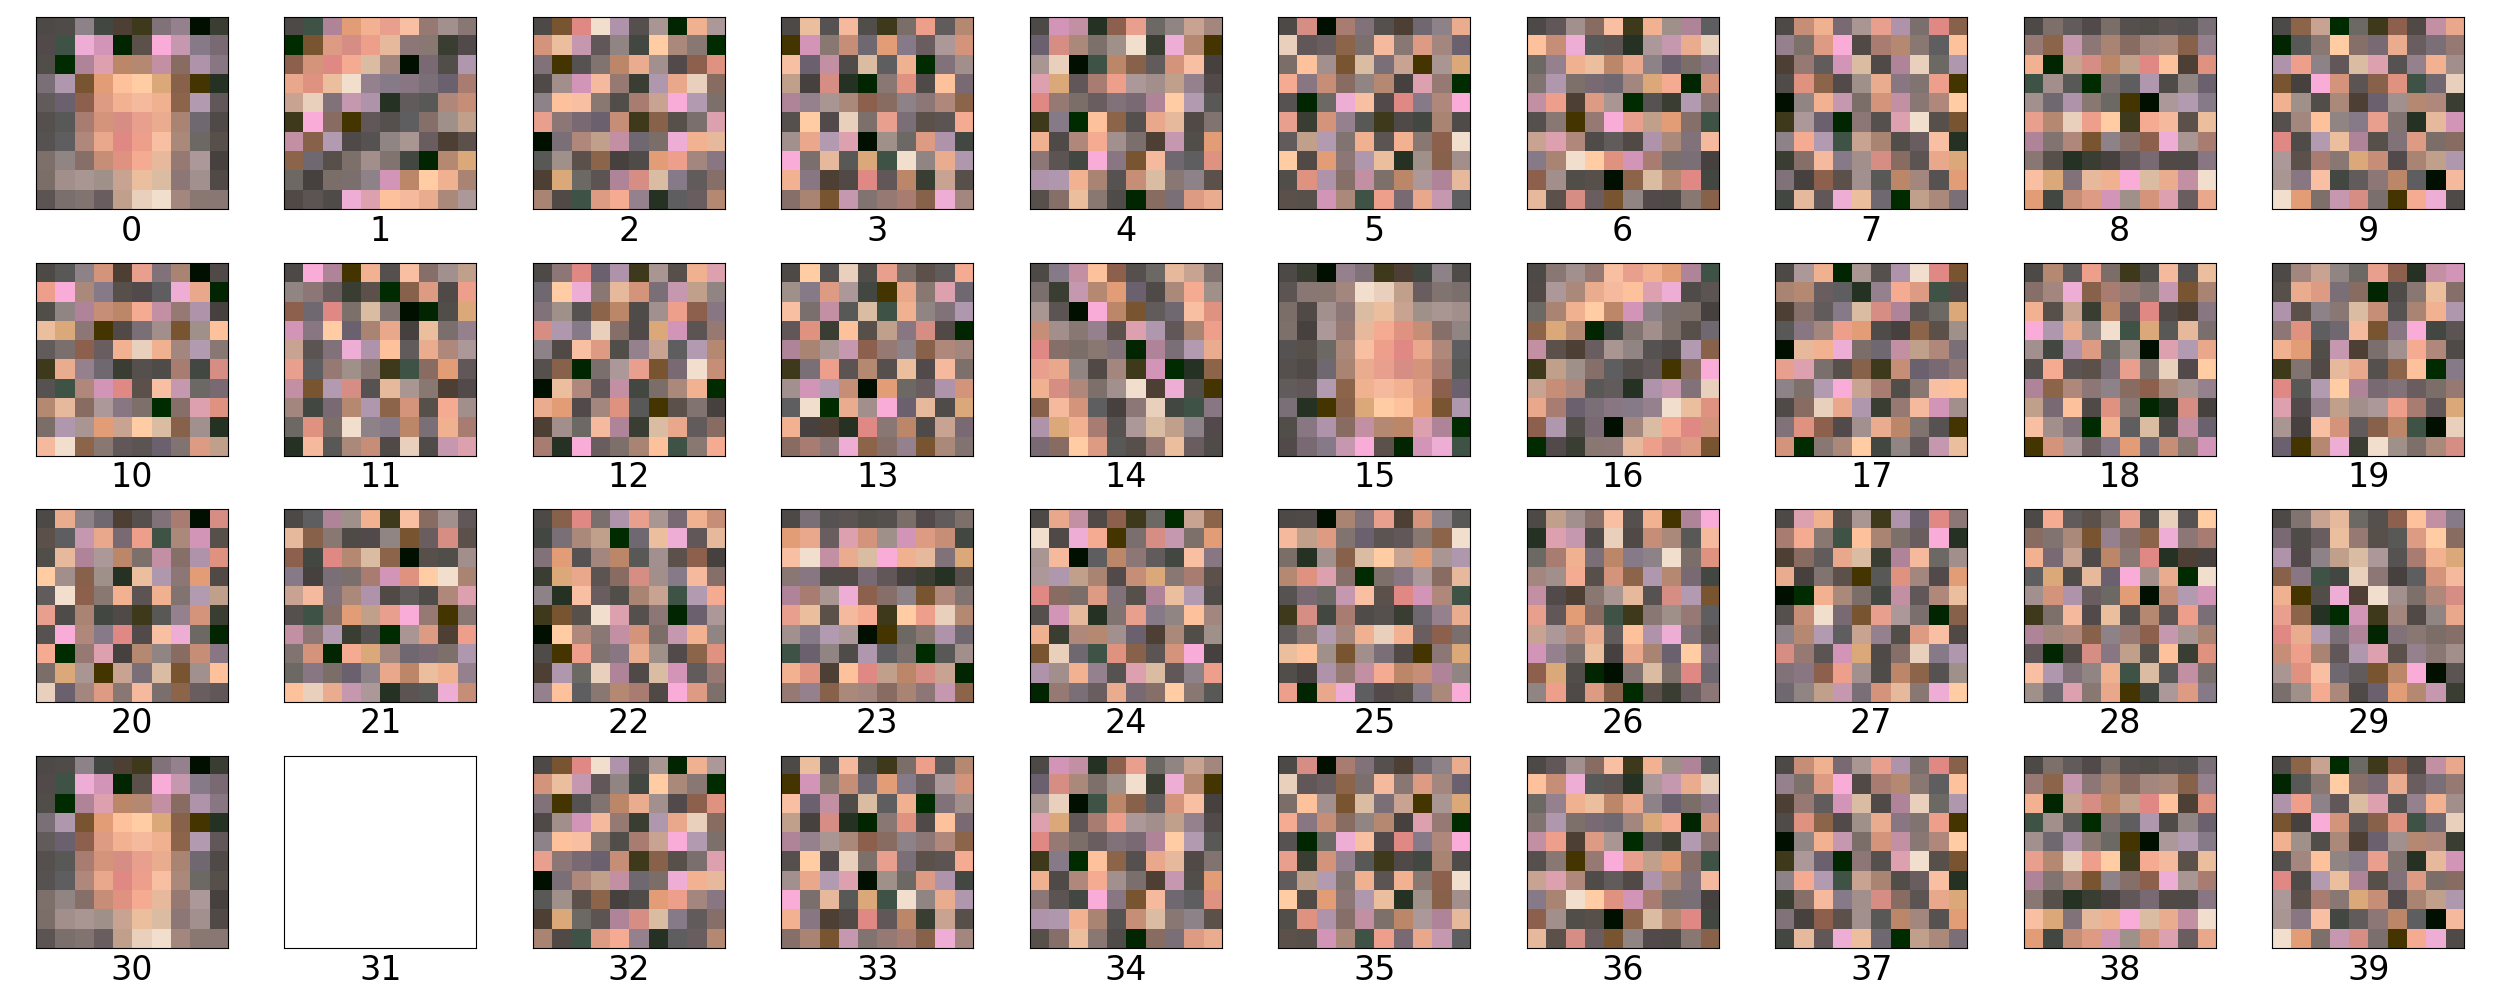

In [7]:
cat_map(KKS, 40)

We can see that the recurrance "times" decreases with the decrease in pixel count. 

For the $124 \times 124$ picture, the time is 15 mappings. 

For the $32 \times 32$ picture, the time is 24 mappings. 

For the $10 \times 10$ picture, the time is 30 mappings. 
